### Early-Stopping Applied to the Overfitting Model  

_Example_
```python
early_stopping = EarlyStopping()
model.fit(X_train, Y_train, nb_epoch=1000, callbacks=[early_stopping])
```  

The following factors can be set in the __EarlyStopping__ callback function:
```python
keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
```  
- _monitor_ : What you want to observe  
- _min_delta_ : If the amount of change is less than _min_delta_ , it is judged there is no improvement.  
- _patience_ : If specified as 10, the learning will end if the epochs with no improvement continues for the 10th time.  
- _verbose_ : How detailed the information will be displayed. (0, 1, 2)  
- _mode_ : To specify criteria to determine that there is no improvement on observation items.  
 - _auto_ : Automatically specify according to the name you observe.  
 - _min_ : To quit when observation stops decreasing  
 - _max_ : To quit when observation stops increasing  
 

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])



Using TensorFlow backend.
/Users/soominlee/.pyenv/versions/3.7.5/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### To define the callback func. for the earlyStopping

In [2]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience = 20) 
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 224us/step - loss: 2.2576 - accuracy: 0.1643 - val_loss: 2.2272 - val_accuracy: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s 88us/step - loss: 2.2072 - accuracy: 0.1657 - val_loss: 2.1908 - val_accuracy: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s 84us/step - loss: 2.1730 - accuracy: 0.1729 - val_loss: 2.1631 - val_accuracy: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 84us/step - loss: 2.1441 - accuracy: 0.1786 - val_loss: 2.1372 - val_accuracy: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 82us/step - loss: 2.1177 - accuracy: 0.1900 - val_loss: 2.1141 - val_accuracy: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s 80us/step - loss: 2.0940 - accuracy: 0.2029 - val_loss: 2.0931 - val_accuracy: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s 81us/step - loss: 2.0721

Epoch 57/3000
700/700 [==============================] - 0s 84us/step - loss: 1.7641 - accuracy: 0.2714 - val_loss: 1.8390 - val_accuracy: 0.2167
Epoch 58/3000
700/700 [==============================] - 0s 76us/step - loss: 1.7616 - accuracy: 0.2557 - val_loss: 1.8347 - val_accuracy: 0.2267
Epoch 59/3000
700/700 [==============================] - 0s 76us/step - loss: 1.7590 - accuracy: 0.2671 - val_loss: 1.8329 - val_accuracy: 0.2233
Epoch 60/3000
700/700 [==============================] - 0s 77us/step - loss: 1.7552 - accuracy: 0.2614 - val_loss: 1.8256 - val_accuracy: 0.2500
Epoch 61/3000
700/700 [==============================] - 0s 78us/step - loss: 1.7566 - accuracy: 0.2814 - val_loss: 1.8336 - val_accuracy: 0.2400
Epoch 62/3000
700/700 [==============================] - 0s 77us/step - loss: 1.7531 - accuracy: 0.2729 - val_loss: 1.8312 - val_accuracy: 0.2267
Epoch 63/3000
700/700 [==============================] - 0s 74us/step - loss: 1.7505 - accuracy: 0.2857 - val_loss: 1.8299 -

700/700 [==============================] - 0s 77us/step - loss: 1.6737 - accuracy: 0.3100 - val_loss: 1.8196 - val_accuracy: 0.2300
Epoch 114/3000
700/700 [==============================] - 0s 77us/step - loss: 1.6724 - accuracy: 0.3014 - val_loss: 1.8221 - val_accuracy: 0.2300
Epoch 115/3000
700/700 [==============================] - 0s 76us/step - loss: 1.6711 - accuracy: 0.3071 - val_loss: 1.8128 - val_accuracy: 0.2333
Epoch 116/3000
700/700 [==============================] - 0s 75us/step - loss: 1.6703 - accuracy: 0.3157 - val_loss: 1.8255 - val_accuracy: 0.2300
Epoch 117/3000
700/700 [==============================] - 0s 78us/step - loss: 1.6694 - accuracy: 0.3100 - val_loss: 1.8228 - val_accuracy: 0.2333
Epoch 118/3000
700/700 [==============================] - 0s 76us/step - loss: 1.6682 - accuracy: 0.3114 - val_loss: 1.8262 - val_accuracy: 0.2333
Epoch 119/3000
700/700 [==============================] - 0s 76us/step - loss: 1.6670 - accuracy: 0.3257 - val_loss: 1.8216 - val_acc

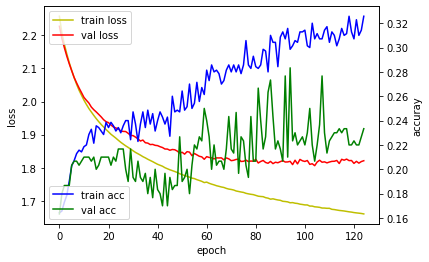

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()